In [1]:
# Dependencies
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Store filepath in a variable
file = "cmpd_traffic_stops.csv"

In [3]:
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
file_df = pd.read_csv(file)

In [4]:
# Show just the header 
file_df.head()

,Month_of_Stop,Reason_for_Stop,Officer_Race,Officer_Gender,Officer_Years_of_Service,Driver_Race,Driver_Ethnicity,Driver_Gender,Driver_Age,Was_a_Search_Conducted,Result_of_Stop,CMPD_Division,ObjectID,CreationDate,Creator,EditDate,Editor
0,2017/04,Vehicle Equipment,Asian / Pacific Islander,Male,15,White,Non-Hispanic,Female,40,No,Verbal Warning,South Division,4001,2018-03-28T09:02:05.349Z,CharlotteNC,2018-03-28T09:02:05.349Z,CharlotteNC
1,2017/04,Speeding,Asian / Pacific Islander,Male,7,White,Non-Hispanic,Male,46,No,Verbal Warning,Providence Division,4002,2018-03-28T09:02:05.349Z,CharlotteNC,2018-03-28T09:02:05.349Z,CharlotteNC
2,2017/04,Vehicle Regulatory,White,Male,19,White,Non-Hispanic,Male,48,No,Citation Issued,Independence Division,4003,2018-03-28T09:02:05.349Z,CharlotteNC,2018-03-28T09:02:05.349Z,CharlotteNC
3,2017/04,Speeding,Hispanic/Latino,Male,3,White,Non-Hispanic,Female,54,No,Citation Issued,Providence Division,4004,2018-03-28T09:02:05.349Z,CharlotteNC,2018-03-28T09:02:05.349Z,CharlotteNC
4,2017/04,Stop Light/Sign,Hispanic/Latino,Female,3,Black,Non-Hispanic,Female,30,No,Verbal Warning,Westover Division,4005,2018-03-28T09:02:05.349Z,CharlotteNC,2018-03-28T09:02:05.349Z,CharlotteNC


In [5]:
data=file_df.iloc[:,0:12]
data.head()

,Month_of_Stop,Reason_for_Stop,Officer_Race,Officer_Gender,Officer_Years_of_Service,Driver_Race,Driver_Ethnicity,Driver_Gender,Driver_Age,Was_a_Search_Conducted,Result_of_Stop,CMPD_Division
0,2017/04,Vehicle Equipment,Asian / Pacific Islander,Male,15,White,Non-Hispanic,Female,40,No,Verbal Warning,South Division
1,2017/04,Speeding,Asian / Pacific Islander,Male,7,White,Non-Hispanic,Male,46,No,Verbal Warning,Providence Division
2,2017/04,Vehicle Regulatory,White,Male,19,White,Non-Hispanic,Male,48,No,Citation Issued,Independence Division
3,2017/04,Speeding,Hispanic/Latino,Male,3,White,Non-Hispanic,Female,54,No,Citation Issued,Providence Division
4,2017/04,Stop Light/Sign,Hispanic/Latino,Female,3,Black,Non-Hispanic,Female,30,No,Verbal Warning,Westover Division


In [6]:
data['Officer_Race'].value_counts()

White                             34766
Black/African American             8274
Asian / Pacific Islander           2862
Hispanic/Latino                    2207
                                    357
Not Specified                       233
American Indian/Alaska Native       134
2 or More                            51
Native Hawaiian/Oth Pac Island       36
Name: Officer_Race, dtype: int64

In [7]:
data['Reason_for_Stop'].value_counts()

Vehicle Regulatory           19238
Speeding                     12798
Vehicle Equipment             5706
Stop Light/Sign               5076
Safe Movement                 3125
Investigation                 1122
Other                         1113
SeatBelt                       520
CheckPoint                     154
Driving While Impaired          68
Name: Reason_for_Stop, dtype: int64

In [8]:
data['Was_a_Search_Conducted'].value_counts()

No     46758
Yes     2162
Name: Was_a_Search_Conducted, dtype: int64

In [9]:
#Map categorical values
#wcdict = {'Yes':1,'No':1}
#data_new = data.applymap(lambda s: wcdict.get(s) if s in wcdict else s)
#data_new.head()
data['Month']=data['Month_of_Stop'].apply(lambda x: int(str(x)[-2:]))
data.head()

,Month_of_Stop,Reason_for_Stop,Officer_Race,Officer_Gender,Officer_Years_of_Service,Driver_Race,Driver_Ethnicity,Driver_Gender,Driver_Age,Was_a_Search_Conducted,Result_of_Stop,CMPD_Division,Month
0,2017/04,Vehicle Equipment,Asian / Pacific Islander,Male,15,White,Non-Hispanic,Female,40,No,Verbal Warning,South Division,4
1,2017/04,Speeding,Asian / Pacific Islander,Male,7,White,Non-Hispanic,Male,46,No,Verbal Warning,Providence Division,4
2,2017/04,Vehicle Regulatory,White,Male,19,White,Non-Hispanic,Male,48,No,Citation Issued,Independence Division,4
3,2017/04,Speeding,Hispanic/Latino,Male,3,White,Non-Hispanic,Female,54,No,Citation Issued,Providence Division,4
4,2017/04,Stop Light/Sign,Hispanic/Latino,Female,3,Black,Non-Hispanic,Female,30,No,Verbal Warning,Westover Division,4


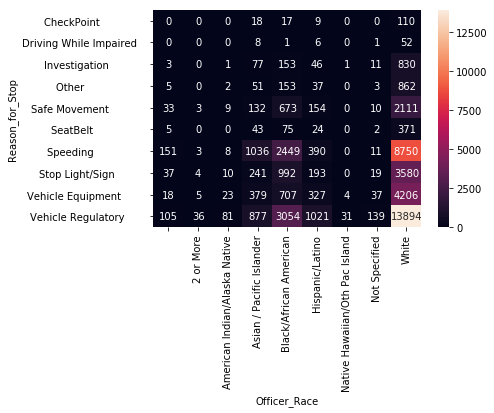

In [10]:
ct=pd.crosstab(data['Reason_for_Stop'],data['Officer_Race'])
sb.heatmap(ct,annot=True,fmt='')

# Observation - vast majority of stops by White officers

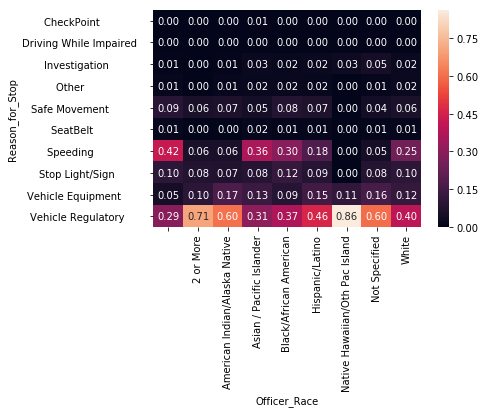

In [11]:
ct=pd.crosstab(data['Reason_for_Stop'],data['Officer_Race'],normalize='columns')
sb.heatmap(ct,annot=True,fmt='.2f')

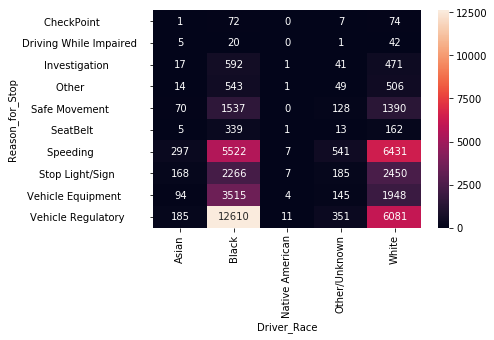

In [12]:
ct=pd.crosstab(data['Reason_for_Stop'],data['Driver_Race'])
sb.heatmap(ct,annot=True,fmt='')

# Observation - most stops - Black drivers, regulatory

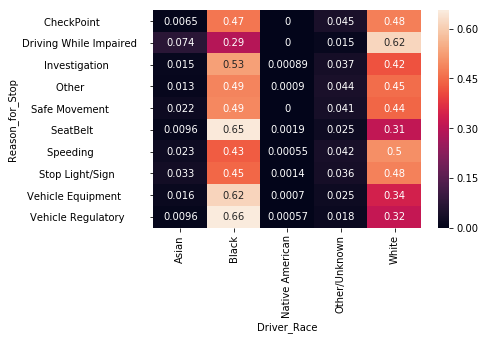

In [13]:
ct=pd.crosstab(data['Reason_for_Stop'],data['Driver_Race'], normalize='index')
sb.heatmap(ct, annot=True)

# Observation -  seatbelt, equipment, regulatory - Black drivers more often
# Observation - DUI -White drivers more often  

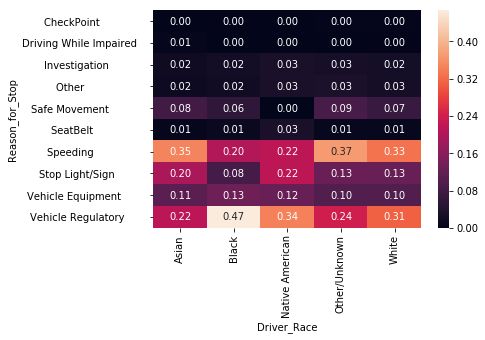

In [14]:
ct=pd.crosstab(data['Reason_for_Stop'],data['Driver_Race'], normalize='columns')
sb.heatmap(ct,annot=True,fmt='.2f')

# Observation - Black drivers stopped primarily for: vehicle refulatory

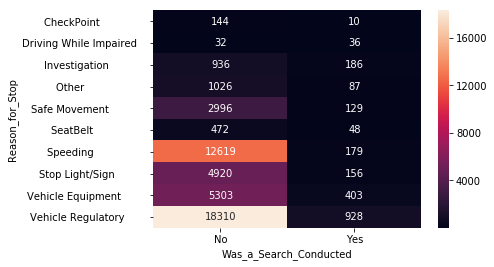

In [15]:
ct=pd.crosstab(data['Reason_for_Stop'],data['Was_a_Search_Conducted'])
sb.heatmap(ct,annot=True,fmt='')

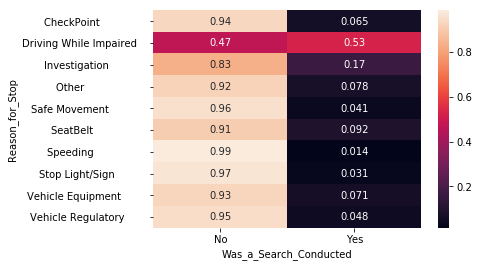

In [16]:
ct=pd.crosstab(data['Reason_for_Stop'],data['Was_a_Search_Conducted'],normalize='index')
sb.heatmap(ct,annot=True)

# Observation - Search on DUI stop - 53/47


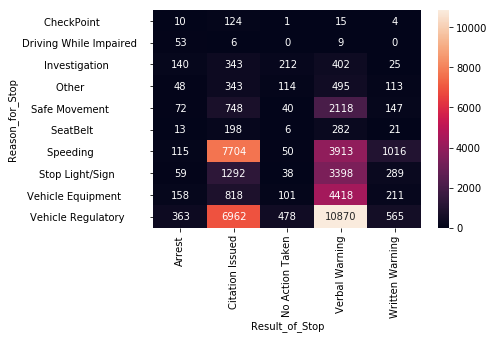

In [17]:
ct=pd.crosstab(data['Reason_for_Stop'],data['Result_of_Stop'])
sb.heatmap(ct,annot=True,fmt='')

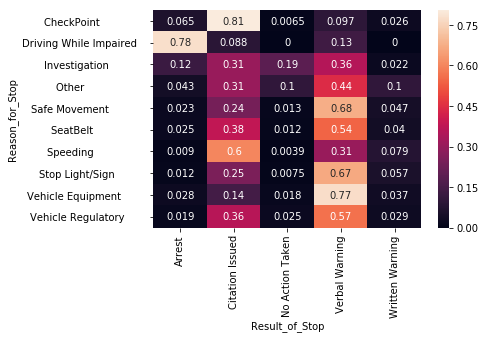

In [18]:
ct=pd.crosstab(data['Reason_for_Stop'],data['Result_of_Stop'],normalize='index')
sb.heatmap(ct,annot=True)

# Observation - Speeding - citation in 60% cases. DUI -  arrest in 78%

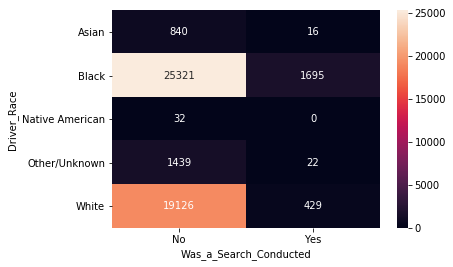

In [19]:
ct=pd.crosstab(data['Driver_Race'],data['Was_a_Search_Conducted'])
sb.heatmap(ct,annot=True,fmt='')

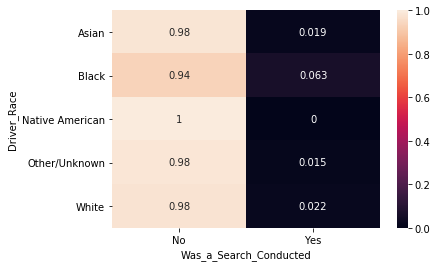

In [20]:
ct=pd.crosstab(data['Driver_Race'],data['Was_a_Search_Conducted'],normalize='index')
sb.heatmap(ct,annot=True)

# Observation - Female officers conduct search as often as male. Male drivers get searched more often

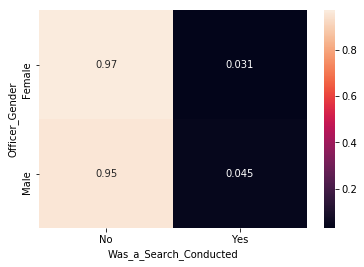

In [21]:
ct=pd.crosstab(data['Officer_Gender'],data['Was_a_Search_Conducted'],normalize='index')
sb.heatmap(ct,annot=True)

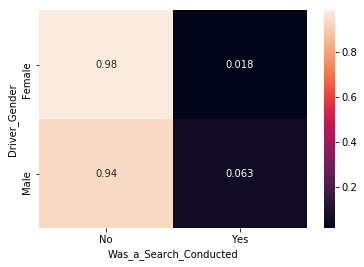

In [22]:
ct=pd.crosstab(data['Driver_Gender'],data['Was_a_Search_Conducted'],normalize='index')
sb.heatmap(ct,annot=True)

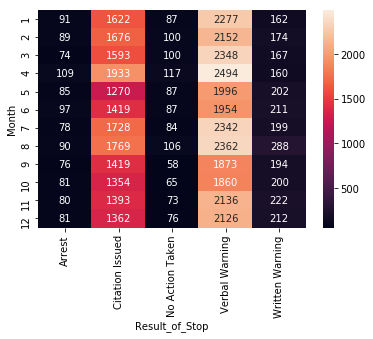

In [23]:
ct=pd.crosstab(data['Month'],data['Result_of_Stop'])
sb.heatmap(ct,annot=True,fmt='')

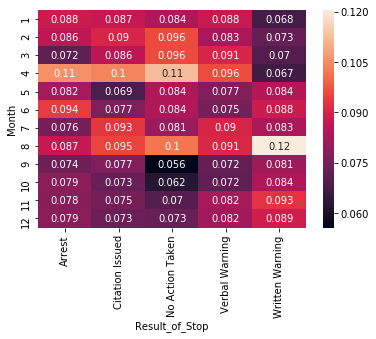

In [24]:
ct=pd.crosstab(data['Month'],data['Result_of_Stop'],normalize='columns')
sb.heatmap(ct,annot=True)

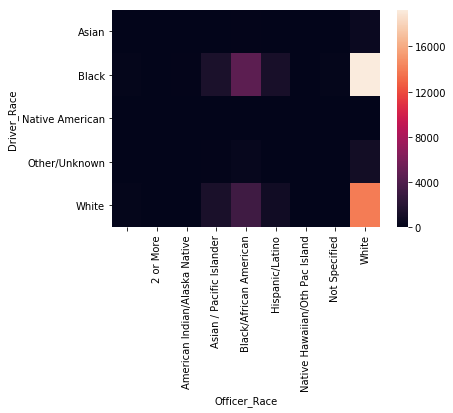

In [25]:
ct=pd.crosstab(data['Driver_Race'],data['Officer_Race'])
sb.heatmap(ct)

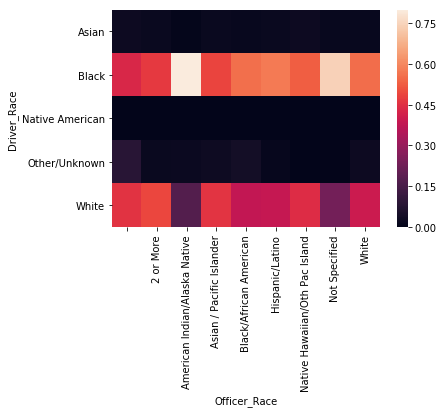

In [27]:
ct=pd.crosstab(data['Driver_Race'],data['Officer_Race'],normalize='columns')
sb.heatmap(ct)

In [ ]:
ct=pd.crosstab(data['Result_of_Stop'],data['Officer_Race'])
sb.heatmap(ct)

In [ ]:
ct=pd.crosstab(data['Result_of_Stop'],data['Officer_Race'], normalize='columns')
sb.heatmap(ct)

In [ ]:
ct=pd.crosstab(data['Result_of_Stop'],data['Officer_Race'], normalize='index')
sb.heatmap(ct)

In [ ]:
ct=pd.crosstab(data['Result_of_Stop'],data['Driver_Race'])
sb.heatmap(ct)

In [ ]:
ct=pd.crosstab(data['Result_of_Stop'],data['Driver_Race'], normalize='columns')
sb.heatmap(ct)

In [ ]:
ct=pd.crosstab(data['Result_of_Stop'],data['CMPD_Division'])
sb.heatmap(ct)

In [ ]:
ct=pd.crosstab(data['Result_of_Stop'],data['CMPD_Division'],normalize='columns')
sb.heatmap(ct)

# Observation - South and Providence Division does most the speeding tickets and more often than others. North Tryon does regulatory a lot and often

In [ ]:
ct=pd.crosstab(data['Reason_for_Stop'],data['CMPD_Division'])
sb.heatmap(ct)

In [ ]:
ct=pd.crosstab(data['Reason_for_Stop'],data['CMPD_Division'],normalize='columns')
sb.heatmap(ct)

# Observation - Metro division stops Black more often. South and Providence divisions stop most and most often White.

In [ ]:
ct=pd.crosstab(data['Driver_Race'],data['CMPD_Division'])
sb.heatmap(ct)

In [ ]:
ct=pd.crosstab(data['Driver_Race'],data['CMPD_Division'], normalize='columns')
sb.heatmap(ct)

In [ ]:
ct=pd.crosstab(data['Officer_Race'],data['CMPD_Division'])
sb.heatmap(ct)

In [ ]:
ct=pd.crosstab(data['Officer_Race'],data['CMPD_Division'])
sb.heatmap(ct)

In [ ]:
ct=pd.crosstab(data['Reason_for_Stop'],data['Month'])
sb.heatmap(ct)

In [ ]:
ct=pd.crosstab(data['Reason_for_Stop'],data['Month'],normalize='index')
sb.heatmap(ct)

In [ ]:
ct=pd.crosstab(data['CMPD_Division'],data['Month'])
sb.heatmap(ct)

In [ ]:
data.groupby('Officer_Gender').boxplot(column='Officer_Years_of_Service', by='Reason_for_Stop',rot=30, figsize=(15,5))

In [ ]:
data.groupby('Officer_Gender').boxplot(column='Officer_Years_of_Service', by='Officer_Race',rot=30,figsize=(15,5))

In [ ]:
data.boxplot(column='Officer_Years_of_Service', by='Officer_Gender', rot=30,figsize=(15,5))

In [ ]:
data.groupby('Officer_Gender').boxplot(column='Officer_Years_of_Service', by='Driver_Race', rot=30,figsize=(15,5))

# Observation - Officers get "kinder" with experience, men get "kinder" than women.
# Observation - Arrests are conducted by officers with less years of service

In [ ]:
ct=pd.crosstab(data['Officer_Gender'],data['Was_a_Search_Conducted'])
sb.heatmap(ct, annot=True, fmt='')

In [ ]:
data.groupby('Officer_Gender').boxplot(column='Officer_Years_of_Service', by='Was_a_Search_Conducted', rot=30,figsize=(15,5))

In [ ]:
data.groupby('Officer_Gender').boxplot(column='Officer_Years_of_Service', by='Result_of_Stop', rot=30,figsize=(15,5))

In [ ]:
data.groupby('Officer_Gender').boxplot(column='Officer_Years_of_Service', by='CMPD_Division', rot=30,figsize=(15,5))

In [ ]:
data.groupby('Driver_Gender').boxplot(column='Driver_Age', by='Result_of_Stop', rot=30,figsize=(15,5))

In [ ]:
data.groupby('Driver_Gender').boxplot(column='Driver_Age', by='Reason_for_Stop', rot=30,figsize=(15,5))

# DUI - more women in 40s and older get stopped, than man

In [ ]:
file_df.nunique()

In [ ]:
data.Month.value_counts()

In [ ]:
sb.pairplot(data)

# charts for the mockup

In [ ]:
data.head()

In [ ]:
sb.pairplot(data)

In [ ]:
#data[['Reason_for_Stop','Driver_Gender']].pivot_table(index='Reason_for_Stop',columns='Driver_Gender', values='Driver_Gender', aggfunc=np.count_nonzero).plot(kind='bar', stacked=True, figsize=(10,5),rot=30,title="Reason for Stop")
pd.crosstab(data['Reason_for_Stop'],data['Driver_Gender']).plot(kind='bar', stacked=True, figsize=(10,5),rot=30,title="Reason for Stop")
pd.crosstab(data['Reason_for_Stop'],data['Driver_Gender'],normalize='index').plot(kind='bar', stacked=True, figsize=(10,5),rot=30,title="Reason for Stop")

In [ ]:
#data[['Driver_Age','Driver_Gender']].pivot_table(index='Driver_Age',columns='Driver_Gender', values='Driver_Gender', aggfunc=np.count_nonzero).plot(kind='bar', stacked=True, figsize=(15,5),rot=90,title="Driver Age and Gender")
pd.crosstab(data['Driver_Age'],data['Driver_Gender']).plot(kind='bar', stacked=True, figsize=(15,5),title="Driver Age and Gender")
pd.crosstab(data['Driver_Age'],data['Driver_Gender'],normalize='index').plot(kind='bar', stacked=True, figsize=(15,5),title="Driver Age and Gender")

In [ ]:
data.boxplot(column='Driver_Age', by='Driver_Gender', rot=30,figsize=(10,5))

In [ ]:
data[['Officer_Years_of_Service','Officer_Gender']].pivot_table(index='Officer_Years_of_Service',columns='Officer_Gender', values='Officer_Gender', aggfunc=np.count_nonzero).plot(kind='bar', stacked=True, figsize=(10,5),rot=90,title='Officer Years of Service and Gender')

In [ ]:
#data[['Officer_Race','Driver_Race']].pivot_table(index='Officer_Race',columns='Driver_Race', values='Driver_Race', aggfunc=np.count_nonzero).plot(kind='bar', stacked=True, figsize=(10,5),rot=30,title="Officer and Driver Race")
pd.crosstab(data['Driver_Race'],data['Officer_Race']).plot(kind='bar', stacked=True, figsize=(10,5),title="Officer and Driver Race",rot=30)
pd.crosstab(data['Driver_Race'],data['Officer_Race'],normalize='index').plot(kind='bar', stacked=True, figsize=(10,5),title="Officer and Driver Race",rot=30)

In [ ]:
data[['Result_of_Stop','Was_a_Search_Conducted']].pivot_table(index='Result_of_Stop',columns='Was_a_Search_Conducted', values='Was_a_Search_Conducted', aggfunc=np.count_nonzero).plot(kind='bar', stacked=True, figsize=(10,5),rot=90,title="Search and Result of Stop")

In [ ]:
data.groupby('Officer_Gender').boxplot(column='Officer_Years_of_Service', by='Result_of_Stop', rot=30,figsize=(15,5))
plt.show()

In [ ]:
#data[['Officer_Years_of_Service','Result_of_Stop']].pivot_table(index='Officer_Years_of_Service',columns='Result_of_Stop', values='Result_of_Stop', aggfunc=np.count_nonzero).plot(kind='bar', stacked=True, figsize=(10,5),rot=90)
pd.crosstab(data['Officer_Years_of_Service'],data['Result_of_Stop']).plot(kind='bar', stacked=True, figsize=(10,5),title="Result of Stop and Officer Years in Service")
pd.crosstab(data['Officer_Years_of_Service'],data['Result_of_Stop'],normalize='index').plot(kind='bar', stacked=True, figsize=(10,5),title="Result of Stop and Officer Years in Service")

In [ ]:
data.Month.value_counts().plot(kind='pie', title="Month")

In [ ]:
#Map categorical values
##reason_dict = {'Yes':1,'No':1}
#data_new = data.applymap(lambda s: wcdict.get(s) if s in wcdict else s)
#data_new.head()
data.head()